In [110]:
#1 Оценить  En(ξ)  с помощью МСМС для графа 8х8
import numpy as np
import matplotlib.pyplot as plt
def proposal(current, ind, **kwargs):
    _ = kwargs
    ind = np.random.choice(8,2)
    current[ind[0]][ind[1]] = 1
    if ind[0] > 0:
        if(current[ind[0]-1][ind[1]] == 1): current[ind[0]][ind[1]] = 0
    if ind[0] < 7:
        if(current[ind[0]+1][ind[1]] == 1): current[ind[0]][ind[1]] = 0
    if ind[1] > 0:
        if(current[ind[0]][ind[1]-1] == 1): current[ind[0]][ind[1]] = 0
    if ind[1] < 7:
        if(current[ind[0]][ind[1]+1] == 1): current[ind[0]][ind[1]] = 0
    return current
def metroplis(start, value, proposal, niter, nburn=0, **kwargs):
    current = start
    post = []
    for i in range(niter):
        val = value(current, **kwargs)
        ind = np.random.choice(8,2)
        proposed = proposal(current, ind, **kwargs)
        p = value(proposed, **kwargs)
        if val > 0: 
            p = p / val
        if np.random.rand() > p:
            current = proposed
        else:
            current[ind[0]][ind[1]] = 0;
        post.append(int(np.sum(current)))
    return post[nburn:] 
def value(x, **kwargs):
    return x.sum()
N = 10000
E = 0
post = metroplis(np.zeros((8,8)), value, proposal, N)
E = np.mean(post)
print(E)


15.2783


In [111]:
#2 Обосновать численно и графически стационарность
def g_test(x):
    return stats.ttest_ind(x[:int(len(x)/2)], x[-int(len(x)/2):], equal_var=False)
g_test(post[:1000])[1]

0.05553881773260206

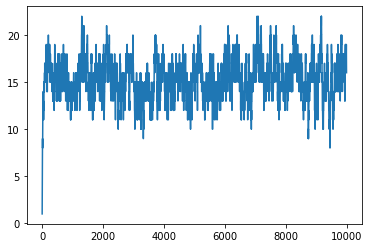

In [116]:
plt.plot(post)
plt.show()